In [15]:
cd /Users/anomalicia/PycharmProjects/diy_projects

/Users/anomalicia/PycharmProjects/diy_projects


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This data was obtained from [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [78]:
with open("master.csv") as myfile:
    head = [next(myfile) for x in range(10)]
df = pd.read_csv('master.csv')

df_us = df[df['country']=='United States']
df_us.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


The following subplots compare the suicide rates between men and women for both the US and the world. It appears that men commit suicide more frequently than women in both cases. A catplot shows frequencies of the categories of one, two or three categorical variables.

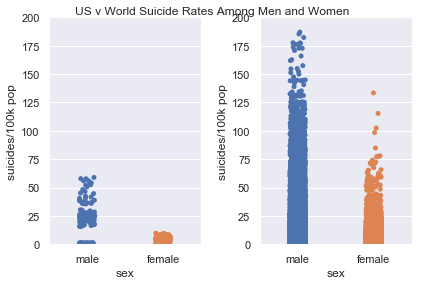

In [111]:
f, axes = plt.subplots(1, 2)
sns.catplot(x="sex", y="suicides/100k pop", data=df_us, ax=axes[0])
sns.catplot(x="sex", y="suicides/100k pop", data=df, ax=axes[1])

axes[0].set_ylim([0, 200])
axes[1].set_ylim([0, 200])
f.suptitle('US v World Suicide Rates Among Men and Women')
f.subplots_adjust(hspace=.5)
plt.close(2)
plt.close(3)
plt.tight_layout()
plt.show()

In the following boxplot, it seems that the older generations are more represented among suicides in the US. The value for Generation Z is so low that it seems possible they were not included among the sample for either df or df_us. 

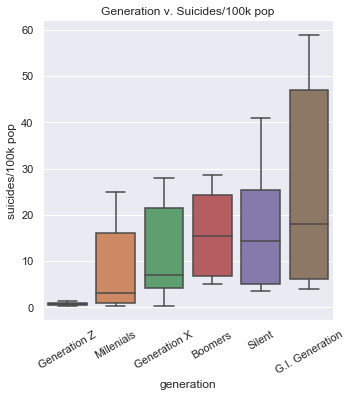

In [114]:
box = sns.catplot(x="generation", y="suicides/100k pop", kind="box", \
            data=df_us, order=["Generation Z", "Millenials", "Generation X", "Boomers", "Silent", "G.I. Generation"])
box.set_xticklabels(rotation=30)
plt.title("Generation v. Suicides/100k pop")
plt.show()

The following bar graph confirms the generational boxplot that suicide is much more common among elderly people than it is for youths. The rate appears to rise sharply in early adulthood, increase slowly through adulthood before leveling off, and then rising sharply again in old age.

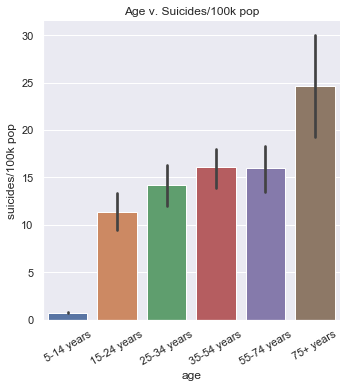

In [119]:
bar = sns.catplot(x="age", y="suicides/100k pop", kind="bar", data=df_us, \
                  order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
bar.set_xticklabels(rotation=30)
plt.title("Age v. Suicides/100k pop")
plt.show()

Among the ten countries with the highest GDP per capita, the most salient pieces of data are Qatar and San Marino's lower suicide rates. This could possibly be due to Qatar's Middle Eastern location and culture and San Marino's tiny population as a "microstate."

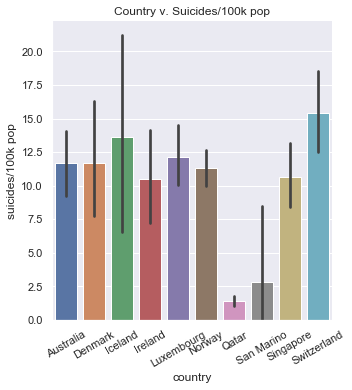

In [120]:
df_top10 = df[df['gdp_per_capita ($)'] > 65874]

bar = sns.catplot(x="country", y="suicides/100k pop", kind="bar", data=df_top10)
bar.set_xticklabels(rotation=30)
plt.title("Country v. Suicides/100k pop")
plt.show()